In [2]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
class ECDF:
    def __init__(self, sample, cdf):
        self.cdf = cdf
        self.grid = sorted(sample)
        self.grid.insert(0, self.grid[0] - 1)
        self.grid.append(self.grid[-1] + 1)
        self.values = [i / len(sample) for i in range(len(sample) + 1)]
        self.values.append(1)
    def get_grid(self):
        return self.grid
    def get_values(self):
        return self.values
    def get_D(self):
        D = 0
        for i in range(1, self.grid.size()):
            D = max(D, abs(self.cdf(grid[i]) - self.values[i]))
            D = max(D, abs(self.cdf(grid[i]) - self.values[i - 1]))
        

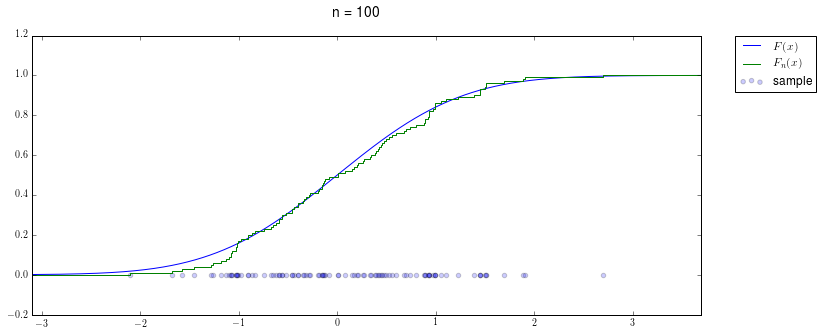

In [13]:
def draw_ecdf_plot(sample, cdf):
    ecdf = ECDF(sample, cdf)
    grid = np.linspace(ecdf.get_grid()[0], ecdf.get_grid()[-1], num=100000)
    
    plt.figure(figsize=(12, 5)).suptitle("n = " + str(len(sample)), fontsize=14)
    plt.axis([ecdf.get_grid()[0], ecdf.get_grid()[-1], -0.2, 1.2])
    plt.rc('text', usetex=True)
    
    plt.plot(grid, cdf(grid), label=r"$F(x)$")
    plt.step(ecdf.get_grid(), ecdf.get_values(), where="post", label=r"$F_n(x)$")
    plt.scatter(sample, np.zeros(len(sample)), alpha=0.2, label="sample")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

draw_ecdf_plot(sps.norm.rvs(size=100), sps.norm.cdf)